# RESPON MODUL 2

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

### SOAL NOMOR 1
#### Gunakan foto selfie masing-masing dengan format jpg dan harus berukuran persegi.

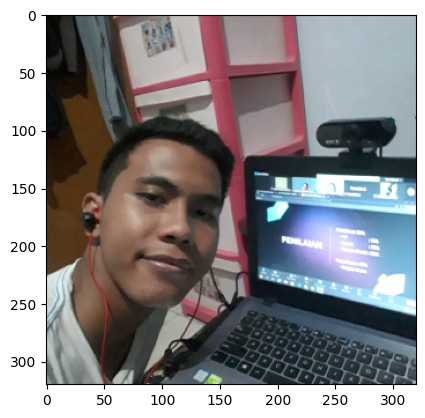

In [2]:
image = plt.imread("selfie.jpg")
plt.imshow(image)

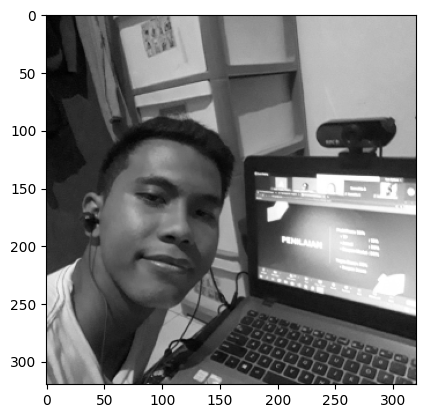

In [3]:
grayscale_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(grayscale_image, cmap = "gray")

### SOAL NOMOR 2
#### Lakukan normalisasi terhadap citra dan tunjukkan histogram hasil normalisasi.

In [4]:
panjang, lebar = grayscale_image.shape
print(panjang, lebar)

320 320


In [9]:
sumGray = np.zeros(256).astype(int)

for i in range(panjang):
    for j in range(lebar):
        value = grayscale_image[i, j]
        sumGray[value] +=1

In [10]:
sumGray.sum()
gray_imgValue = [i for i in range(0, 256)]

Text(0, 0.5, 'Jumlah Piksel')

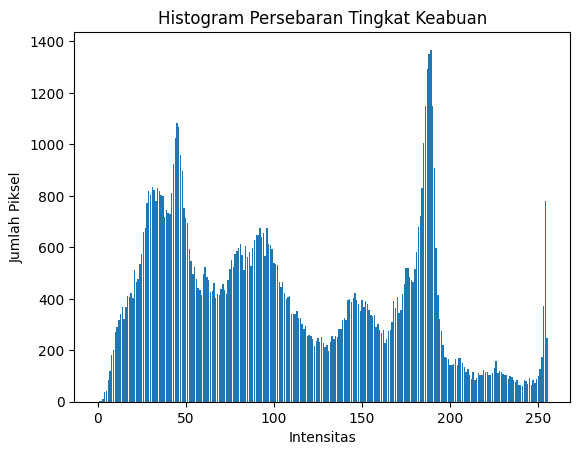

In [11]:
plt.bar(gray_imgValue, sumGray)
plt.title('Histogram Persebaran Tingkat Keabuan')
plt.xlabel('Intensitas')
plt.ylabel('Jumlah Piksel')

Text(0, 0.5, 'probabilitas')

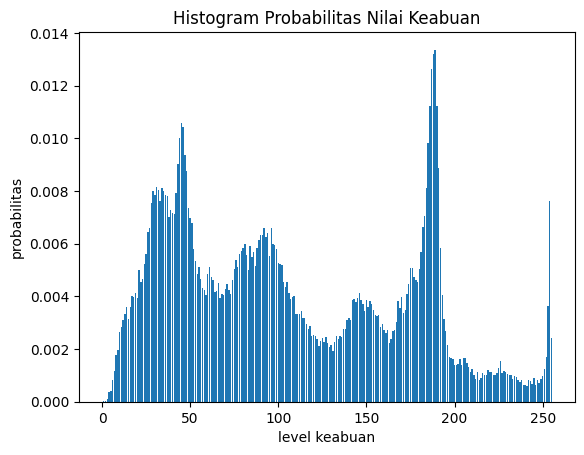

In [28]:
plt.bar(gray_imgValue, sumGray / (panjang * lebar))
plt.title('Histogram Probabilitas Nilai Keabuan')
plt.xlabel('level keabuan')
plt.ylabel('probabilitas')

### SOAL NOMOR 3
#### Lakukan operasi berikut :
#### a. Translasi dengan x = 30, y = -40

In [52]:
x =  30
y = -40

translasi = np.zeros((panjang, lebar)).astype(int)

for i in range(panjang):
    for j in range(lebar):
        if j - 30 > 0 and i + 40 < panjang:
            translasi[i][j] = grayscale_image[i + 40][j - 30]

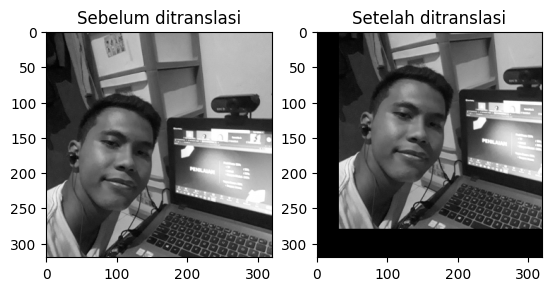

In [53]:
plt.subplot(121)
plt.title("Sebelum ditranslasi")
plt.imshow(grayscale_image, cmap = "gray")
plt.subplot(122)
plt.title("Setelah ditranslasi")
plt.imshow(translasi, cmap = "gray")
plt.show()

#### b. Rotasi 117`(searah jarum jam)

In [24]:
rotation = np.zeros((panjang, lebar)).astype(int)
sudut = np.deg2rad(117)
midRow = int((panjang) / 2)
midCol = int((lebar) / 2)

for i in range (panjang):
    for j in range (lebar):
        y = (i - midCol) * np.cos(sudut) - (j - midRow) * np.sin(sudut)
        x = (i - midCol) * np.sin(sudut) + (j - midRow) * np.cos(sudut)
        y = int(y + midCol)
        x = int(x + midRow)
        if x >= 0 and y >= 0 and x < panjang and y < lebar:
            rotation[i][j] = grayscale_image[y][x]

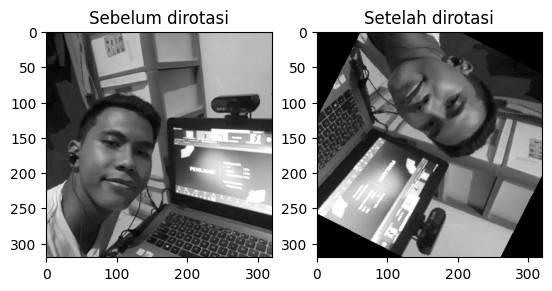

In [25]:
plt.subplot(121)
plt.title("Sebelum dirotasi")
plt.imshow(grayscale_image, cmap = "gray")
plt.subplot(122)
plt.title("Setelah dirotasi")
plt.imshow(rotation, cmap = "gray")
plt.show()

#### c. Refleksi sumbu x

In [21]:
cerminX = np.zeros(grayscale_image.shape)
mirror = panjang - 1

for i in range (panjang):
    for j in range (lebar):
        cerminX[i][j] = grayscale_image[mirror][j]
    mirror -= 1

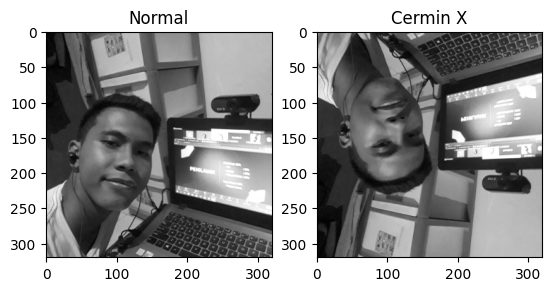

In [22]:
plt.subplot(121)
plt.title("Normal")
plt.imshow(grayscale_image, cmap = "gray")
plt.subplot(122)
plt.title("Cermin X")
plt.imshow(cerminX, cmap = "gray")

#### d. Dilatasi dengan skala = -3

In [54]:
dilatasi = np.zeros([256, 256]) 

for i in range (len(grayscale_image)): 
    for j in range (len(grayscale_image)): 
        for x in range (int(i / 2), int(i / 2) + 3): 
            for y in range (int(j / 2), int(j / 2) + 3): 
                dilatasi[x][y] = grayscale_image[i][j] 

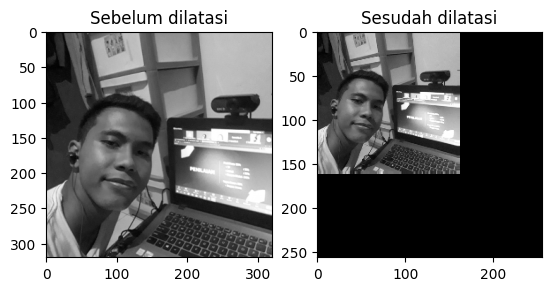

In [55]:
plt.subplot(121)
plt.title("Sebelum dilatasi")
plt.imshow(grayscale_image, cmap = "gray")
plt.subplot(122)
plt.title("Sesudah dilatasi")
plt.imshow(dilatasi, cmap = "gray")

### SOAL NOMOR 4
#### Ubah citra ke dalam bentuk negatif, lalu bandingkan dengan histogram hasil. 

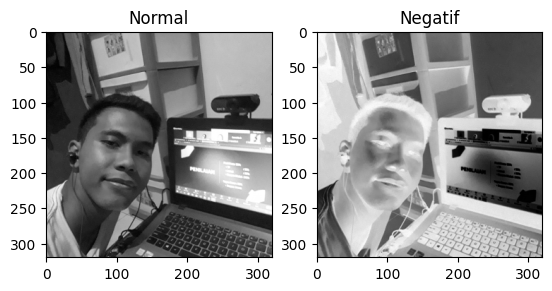

In [38]:
negative = 255 - grayscale_image

plt.subplot(121)
plt.title("Normal")
plt.imshow(grayscale_image, cmap = "gray")
plt.subplot(122)
plt.title("Negatif")
plt.imshow(negative, cmap = "gray")

In [16]:
gray_image = grayscale_image

derajat = np.zeros(256)
for i in range (256):
    derajat[i] = i

in_negative = np.zeros(256)
for row in negative:
    for col in row:
        in_negative[col] += 1

<BarContainer object of 256 artists>

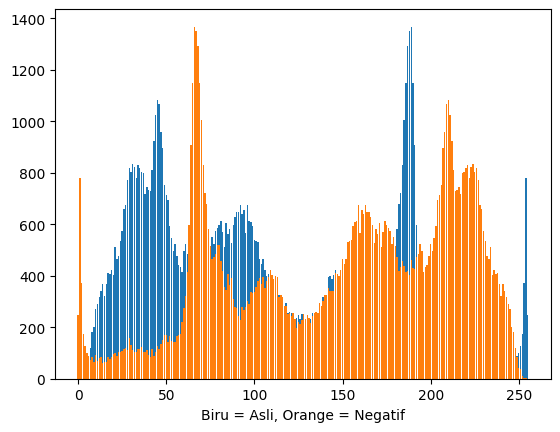

In [20]:
plt.xlabel("Biru = Asli, Orange = Negatif")
plt.bar(gray_imgValue, sumGray)
plt.bar(derajat, in_negative)